# Samuelson-Hicks model
### Kirill Zakharov, Anfisa Lepekhina

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
plt.style.use("ggplot")

## Discrete Samuelson-Hicks model

In [84]:
ca = 1
ia = 2
n = 50
# r = 1.2
# c = 0.75
r = 0.5
c = 0.8

arrayY = [0, 0]
for t in range(2, n):
    y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
    arrayY.append(y)    

### 0 < accelerator < 1

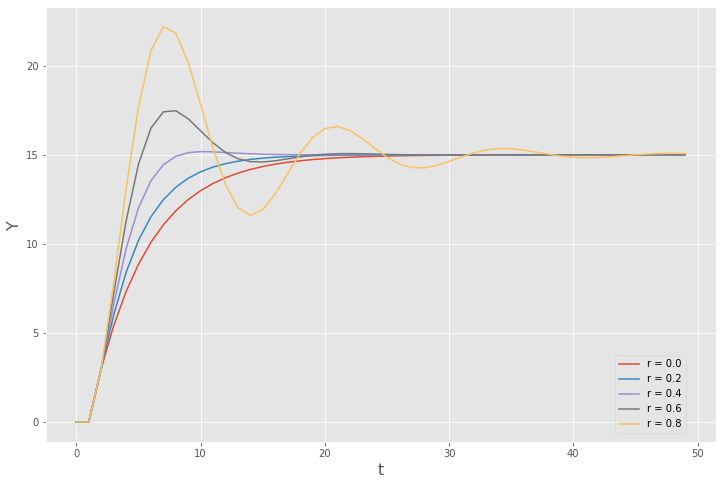

In [85]:
plt.subplots(figsize=(12, 8))
time = np.arange(0, n)

for i in range(5):
    arrayY = [0, 0]
    for t in range(2, n):
        r = i/5
        c = 0.8
        y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
        arrayY.append(y)  
    plt.plot(time, arrayY, label = f'r = {round(r, 2)}')
    
plt.legend(loc=(0.85,0.02))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

### accelerator > 1

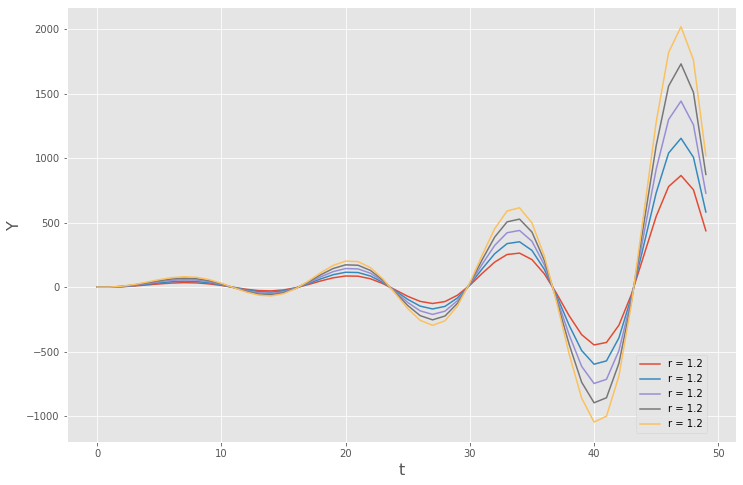

In [86]:
plt.subplots(figsize=(12, 8))
time = np.arange(0, n)

for i in range(5):
    arrayY = [0, 0]
    for t in range(2, n):
        r = 1.2
        c = 0.75
        y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
        arrayY.append(y + i)  
    plt.plot(time, arrayY, label = f'r = {round(r, 2)}')
    
plt.legend(loc=(0.85,0.02))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

### accelerator = 1

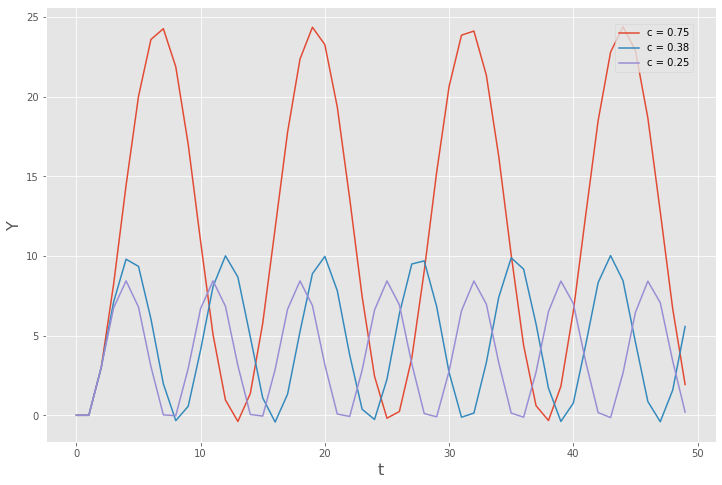

In [87]:
plt.subplots(figsize=(12, 8))
time = np.arange(0, n)

for i in range(3):
    arrayY = [0, 0]
    for t in range(2, n):
        r = 1
        c = 0.75/(i+1)
        y = ca + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia
        arrayY.append(y)  
    plt.plot(time, arrayY, label = f'c = {round(c, 2)}')
    
plt.legend(loc=(0.85,0.85))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)
plt.show()

## Continuous Samuelson-Hicks model

In [6]:
#Runge-Kutt method
def runge_Kutt(f, g, t0, x0, y0, h, b):
    t = t0
    x = x0
    y = y0
    arrayX = np.array([])
    arrayY = np.array([])
    arrayT = np.array([])
    while t<b:
        k1 = g(t, x, y)
        q1 = f(t, x, y)
        
        k2 = g(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        q2 = f(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        
        k3 = g(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        q3 = f(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        
        k4 = g(t + h, x + h*q3, y + h*k3)
        q4 = f(t + h, x + h*q3, y + h*k3)
        
        y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
        x = x + h*(q1 + 2*q2 + 2*q3 + q4)/6
        
        arrayX = np.append(arrayX, x)
        arrayT = np.append(arrayT, t)
        arrayY = np.append(arrayY, y)
        
        t += h
    return arrayT, arrayX, arrayY

In [89]:
ca = 1
r = 1
ia = 2
n = 30
c = 0.08

def f(t, x, y):
    return -(1-r)*x - (1-c)*y + (ca + ia)

def g(t, x, y):
    return x

p1, p2, p3 = runge_Kutt(f, g, 0, 0, 0, 0.01, 100)

### accelerator = 1

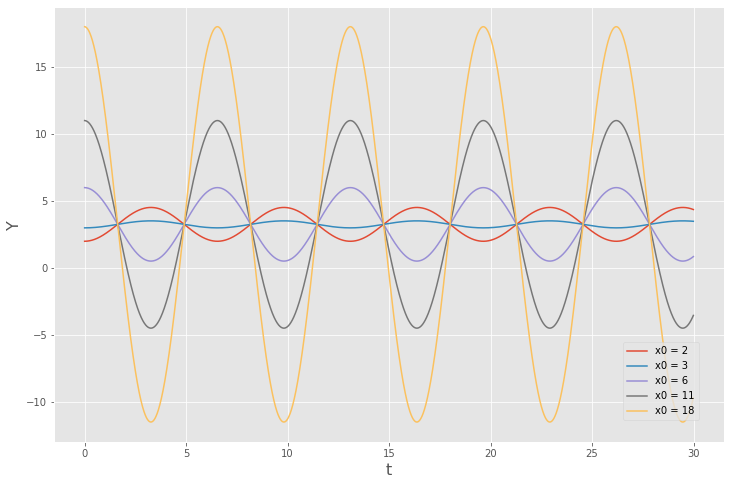

In [90]:
plt.subplots(figsize=(12, 8))

# plt.plot(p1, p2, label = 'X(t)')
for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 30)
    plt.plot(p1, p3, label = f'x0 = {i**2+2}')
    
plt.legend(loc=(0.85,0.05))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

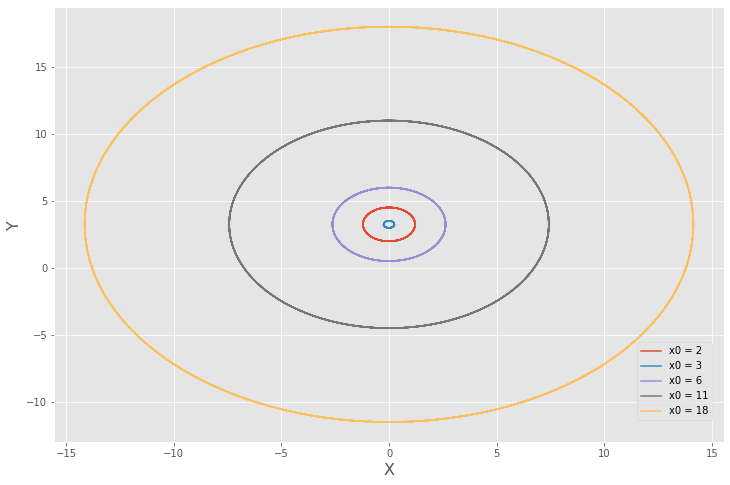

In [9]:
plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p2, p3, label = f'x0 = {i**2+2}')

plt.legend(loc=(0.87,0.05))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

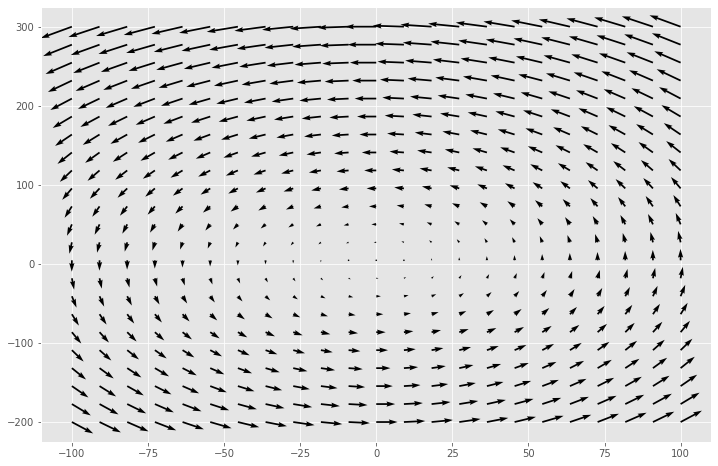

In [10]:
plt.subplots(figsize=(12, 8))
x, y = np.mgrid[-100:100:23j, -200:300:23j]

u = -(1-r)*x - (1-c)*y + (ca + ia)
v = x

plt.quiver(x, y, u , v)
plt.show()

### 0 < accelerator < 1

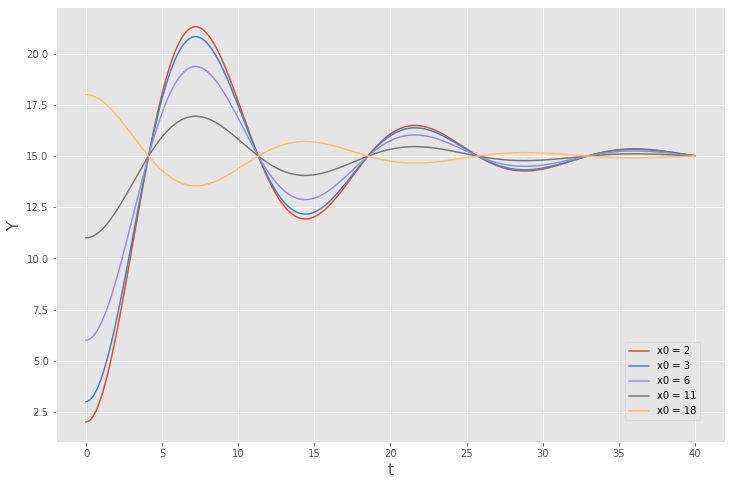

In [11]:
ca = 1
r = 0.8
ia = 2
n = 30
c = 0.8

plt.subplots(figsize=(12, 8))

# plt.plot(p1, p2, label = 'X(t)')
for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p1, p3, label = f'x0 = {i**2+2}')
    
plt.legend(loc=(0.85,0.05))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

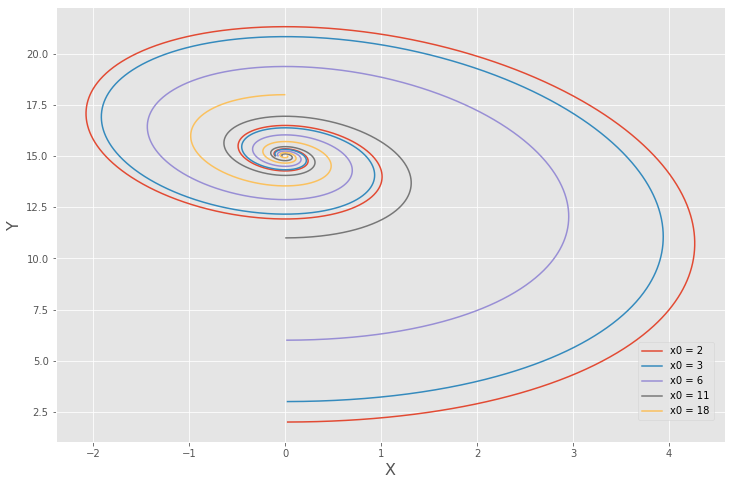

In [12]:
plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p2, p3, label = f'x0 = {i**2+2}')

plt.legend(loc=(0.87,0.05))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

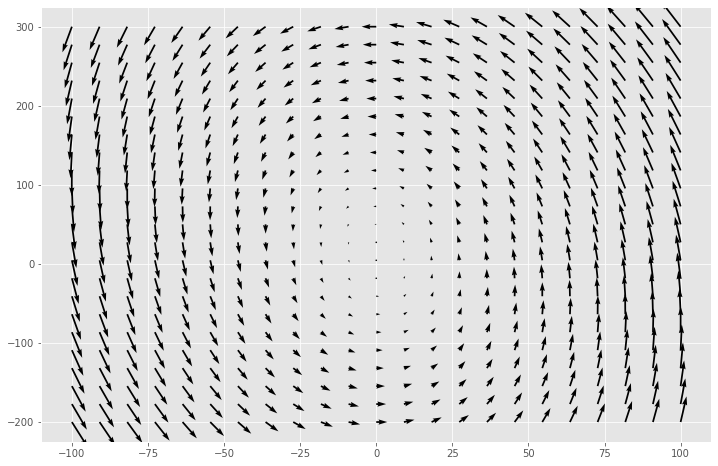

In [13]:
plt.subplots(figsize=(12, 8))
x, y = np.mgrid[-100:100:23j, -200:300:23j]

u = -(1-r)*x - (1-c)*y + (ca + ia)
v = x

plt.quiver(x, y, u , v)
plt.show()

### accelerator > 1

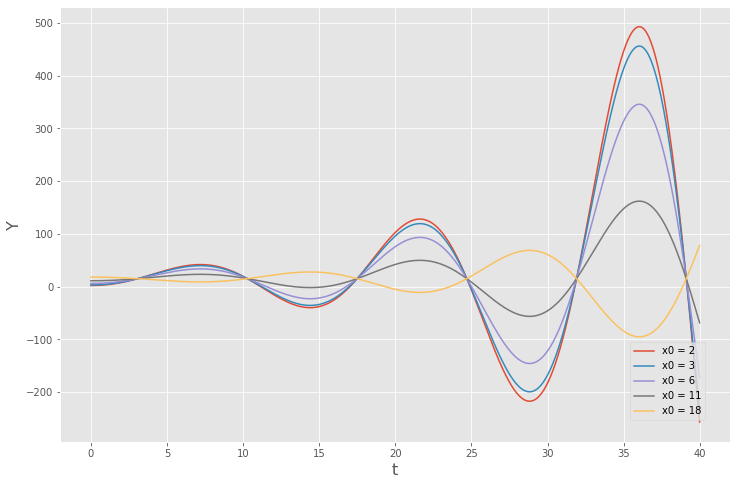

In [14]:
ca = 1
r = 1.2
ia = 2
n = 30
c = 0.8

plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p1, p3, label = f'x0 = {i**2+2}')
    
plt.legend(loc=(0.85,0.05))
plt.xlabel("t", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

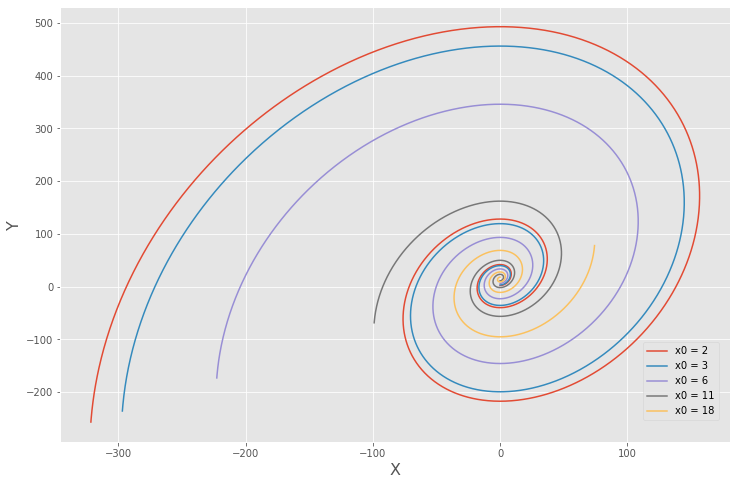

In [15]:
plt.subplots(figsize=(12, 8))

for i in range(5):
    p1, p2, p3 = runge_Kutt(f, g, 0, 0, i**2+2, 0.01, 40)
    plt.plot(p2, p3, label = f'x0 = {i**2+2}')

plt.legend(loc=(0.87,0.05))
plt.xlabel("X", fontsize=16)
plt.ylabel("Y", fontsize=16)  
plt.show()

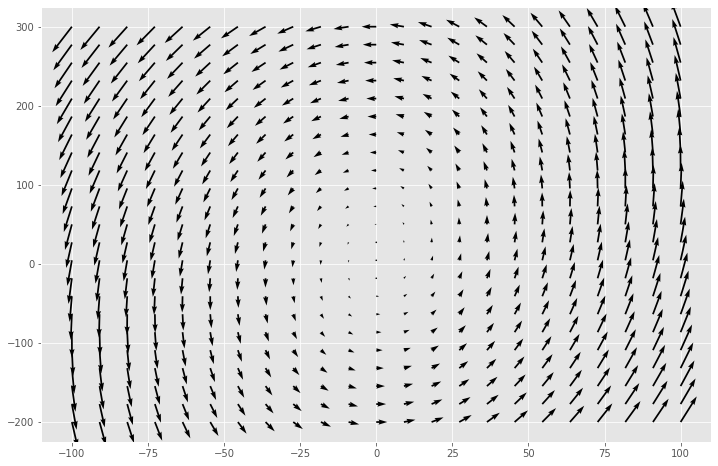

In [16]:
plt.subplots(figsize=(12, 8))
x, y = np.mgrid[-100:100:23j, -200:300:23j]

u = -(1-r)*x - (1-c)*y + (ca + ia)
v = x

plt.quiver(x, y, u , v)
plt.show()

# Modeling GDP of Russia

In [2]:
file = 'Data_Samuelson-Hicks_model.xlsx'

# Load spreadsheet
df = pd.read_excel(file)
df = df[3:]
df.head()

,Year,GDP
3,1998,2629.6
4,1999,4823.2
5,2000,7305.6
6,2001,8943.6
7,2002,10830.5


## Initial GDP

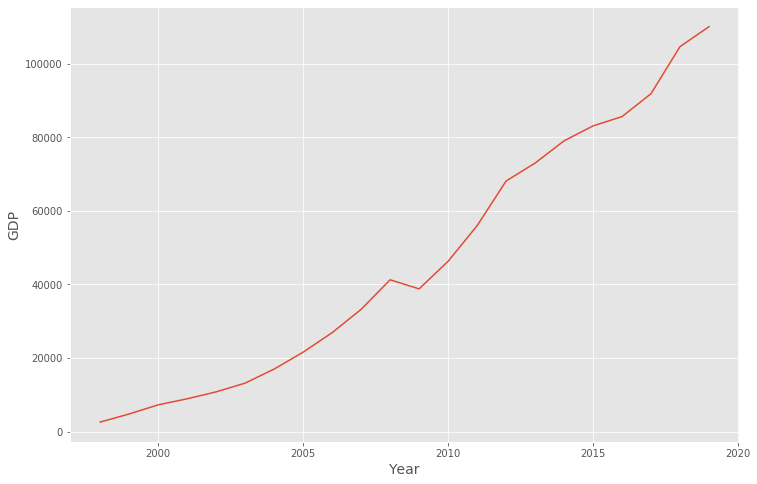

In [3]:
plt.subplots(figsize=(12,8))

plt.plot(list(df["Year"]), list(df["GDP"]))
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP',  fontsize=14)

plt.show()

In [47]:
inv = [6712.39,8581.29,9768.4,10195.9,10532.89,10742.3,11427.4,12433.9,13792.7,14962.9]

## Comparing results

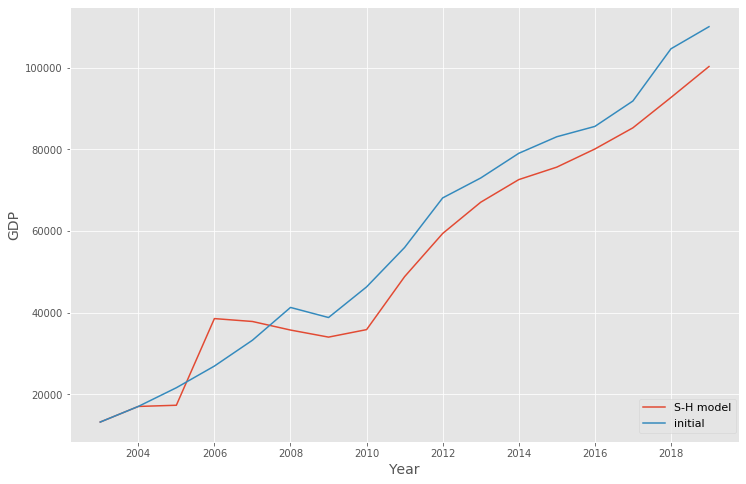

In [67]:
n = 17
r = 0.25
c = 0.5

ia = [407,670.5,1165.3,1504.7,1762.3,2186.3,2865.1,3611.1,24730.2,6716.2,8781.6,7976.1,9152.1,11035.6,\
        12586.1,13450.2,13902.6,13897.1,14748.9,16027.3,17782.1,19318.8]
ia = ia[5:]
ca = [2757.5,3350.0,4239.2,5083.4,6540.7,8216.8,8687.1,10121.5,11285.5,12623.9,\
          13706.7,14629.6,14712.7,16085.7,16770.3,18488.9,19657.6]

arrayY = [13208.2, 17027.2]
# arrayY = list(map(np.log, np.array([13208.2, 17027.2])))
plt.subplots(figsize=(12, 8))
time = np.arange(0, n)

for t in range(2, n):
        if t > 7:
            r = inv[t-7]/(arrayY[t-1]-arrayY[t-2])
        y = ca[t] + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia[t]
        arrayY.append(y)
#         arrayY.append(np.log(y))  
plt.plot(df[5:]['Year'], arrayY, label = 'S-H model')
    
plt.plot(df[5:]['Year'], list(df[5:]["GDP"]), label = 'initial')
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP',  fontsize=14)
    
plt.legend(loc=(0.85,0.02), fontsize=11)
plt.show()

## Variation of accelerator

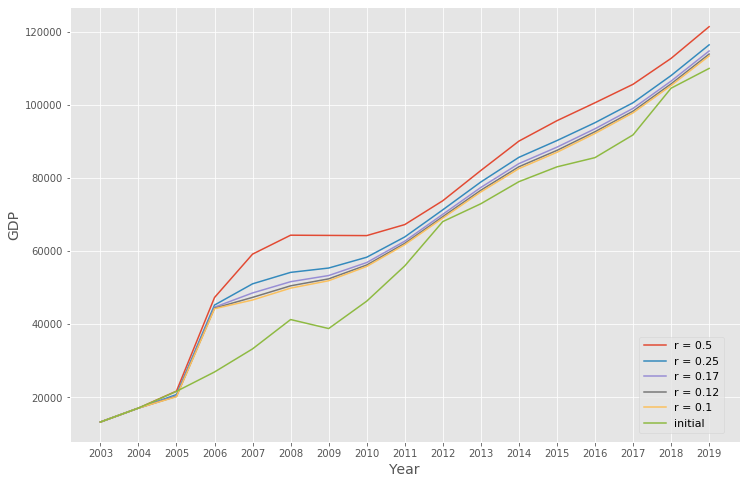

In [73]:
plt.subplots(figsize=(12, 8))
time = np.arange(0, n)
c = 0.7

for i in range(5):
#     r = 0.25
    arrayY = [13208.2, 17027.2]
    r = 0.5/(i+1)
    for t in range(2, n):
            y = ca[t] + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia[t]
            arrayY.append(y)  
    plt.plot(df[5:]['Year'], arrayY, label = f'r = {round(r, 2)}')
    
plt.plot(df[5:]['Year'], list(df[5:]["GDP"]), label = 'initial')
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP',  fontsize=14)
plt.xticks(np.arange(2003,2020))
    
plt.legend(loc=(0.85,0.02), fontsize=11)
plt.show()

## Adding to the model Ito's equation with an equilibrium point

In [74]:
#Ornstein-Uhlenbek process
beta = 0.3
alpha = 1
sigma = 0.2
Nt = 1000

def o_u_process(dt=0.01, x0=0, Nt=1000):
    res = [x0]
    x = x0
    
    for _ in range(1, Nt):
        rand_v = sts.norm(0, 1)
        x = x - beta*(x-alpha)*dt + sigma*np.sqrt(dt)*rand_v.rvs()
        res.append(x)
        
    return res

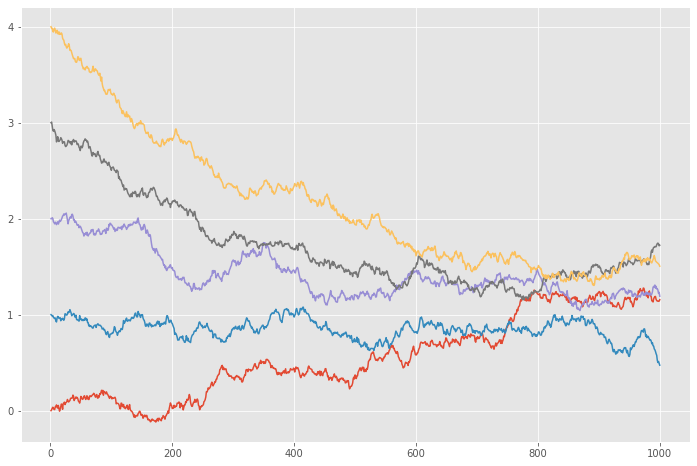

In [75]:
time = np.linspace(1, 1000, Nt)
plt.subplots(figsize=(12,8))

for i in range(5):
    ou_process = o_u_process(0.01, i, Nt)
    plt.plot(time, ou_process)
plt.show()

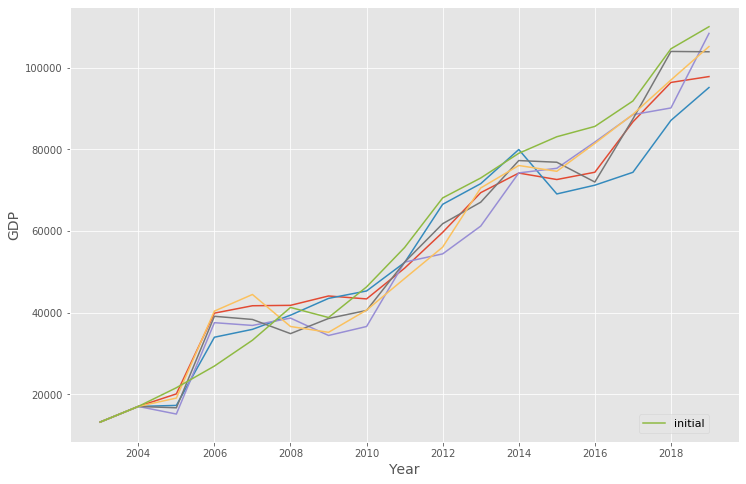

In [84]:
sigma = 20
alpha = 0
beta = 0.1
x0 = 0

n = 17
r = 0.25
c = 0.5

ia = [407,670.5,1165.3,1504.7,1762.3,2186.3,2865.1,3611.1,24730.2,6716.2,8781.6,7976.1,9152.1,11035.6,\
        12586.1,13450.2,13902.6,13897.1,14748.9,16027.3,17782.1,19318.8]
ia = ia[5:]
ca = [2757.5,3350.0,4239.2,5083.4,6540.7,8216.8,8687.1,10121.5,11285.5,12623.9,\
          13706.7,14629.6,14712.7,16085.7,16770.3,18488.9,19657.6]

plt.subplots(figsize=(12, 8))

for _ in range(5):
    arrayY = [13208.2, 17027.2]
    r = 0.25
    for t in range(2, n):
        if t > 7:
            r = inv[t-7]/(arrayY[t-1]-arrayY[t-2])
        rand_v = sts.norm(0, 1)
        d = alpha + (x0-alpha)*np.exp(-beta*t)+sigma*np.sqrt(1-np.exp(-2*beta*t))*rand_v.rvs()/np.sqrt(2*beta)
        y = ca[t] + c*arrayY[t-1] + r*(arrayY[t-1]-arrayY[t-2]) + ia[t] + d*100
        arrayY.append(y)  
    plt.plot(df[5:]['Year'], arrayY)
    
plt.plot(df[5:]['Year'], list(df[5:]["GDP"]), label = 'initial')
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP',  fontsize=14)
    
plt.legend(loc=(0.85,0.02), fontsize=11)
plt.show()